Fitted parameters: [ 5.3018321   5.37179131  0.23885212 25.68208924]


RMSE: 0.2085875700164348
R-squared: 0.9910350500463192



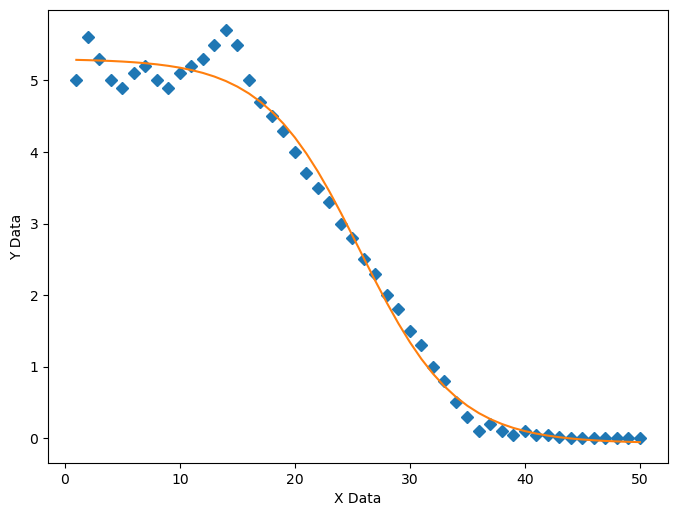

In [9]:
# code credit:
# https://stackoverflow.com/questions/56329180/fitting-a-logistic-curve-to-data

import pandas as pd
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Import data
df = pd.read_csv (r'false_data2.csv')
yData = df.swe
xData = df.doy
# xData = numpy.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0])
# yData = numpy.array([0.073, 2.521, 15.879, 48.365, 72.68, 90.298, 92.111, 93.44, 93.439, 93.389, 93.381, 93.367, 93.94, 93.269, 96.376])

# Define function
def func(x, a, b, c, d):
    return a - b*(1 - 1./(1+np.exp(c*(x-d))))
    # Descending logistic function
    # https://geog0111.readthedocs.io/en/latest/Chapter7_FittingPhenologyModels.html

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)

def generate_Initial_Parameters():
    parameterBounds = []
    parameterBounds.append([0.0, 10.0]) # search bounds for a (top-value)
    parameterBounds.append([-10.0, 10.0]) # search bounds for b (bottom-value)
    parameterBounds.append([0.0, 0.5]) # search bounds for c (slope)
    parameterBounds.append([0.0, 50.0]) # search bounds for d (x-value of the middle slope)

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters = generate_Initial_Parameters()

# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)
print('Fitted parameters:', fittedParameters)
print()

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)